In [10]:
%matplotlib inline

/root/dch/delays/virtualenv/lib64/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/dch/delays/virtualenv/lib64/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [39]:
%load_ext sql
from flights import settings
%sql $settings.DB_URL

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: None@delays'

In [ ]:
%%sql
select round(delay_mins/60) hours, count(*) cnt, rpad('', ln(count(*)), '*') bar 
from flight group by hours;

In [50]:
result = %sql select round(delay_mins/60) hours,  ln(count(*)) bar from flight group by hours;

89 rows affected.


<Container object of 89 artists>

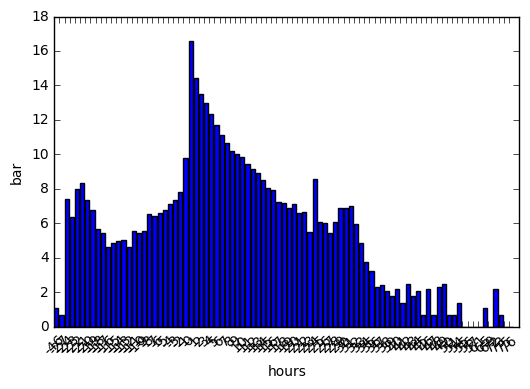

In [51]:
result.bar()

In [15]:
result = %sql select hour(scheduled_departure), count(*), avg(delay_mins) from flight group by hour(scheduled_departure);

24 rows affected.


<Container object of 24 artists>

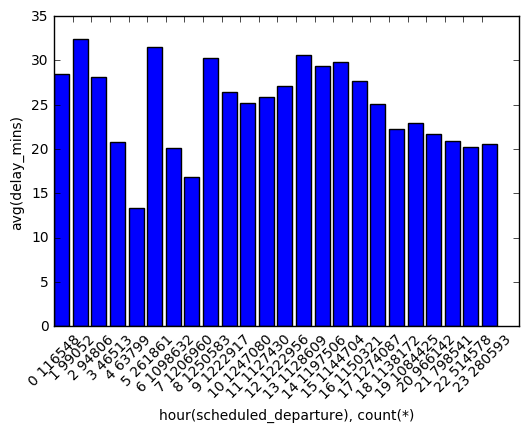

In [16]:
result.bar()

In [ ]:
result = %sql select hour(actual_departure), count(*), avg(delay_mins) from flight group by hour(actual_departure);



<Container object of 24 artists>

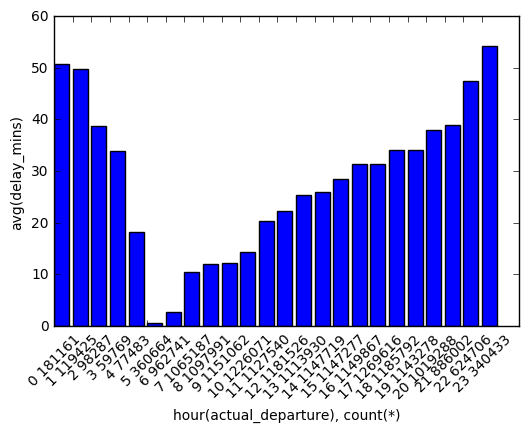

In [19]:
result.bar()

In [24]:
result = %sql select round(a.latitude) lat, avg(f.delay_mins) avg_delay_mins from flight f right join airport a on a.code = f.departure_airport group by round(a.latitude) having avg_delay_mins;

125 rows affected.


<Container object of 125 artists>

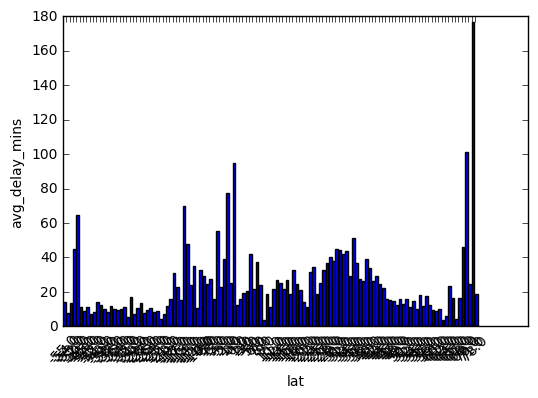

In [25]:
result.bar()

In [26]:
result = %sql select round(a.longitude) lon, avg(f.delay_mins) avg_delay_mins from flight f right join airport a on a.code = f.departure_airport group by round(a.longitude) having avg_delay_mins;

301 rows affected.


<Container object of 301 artists>

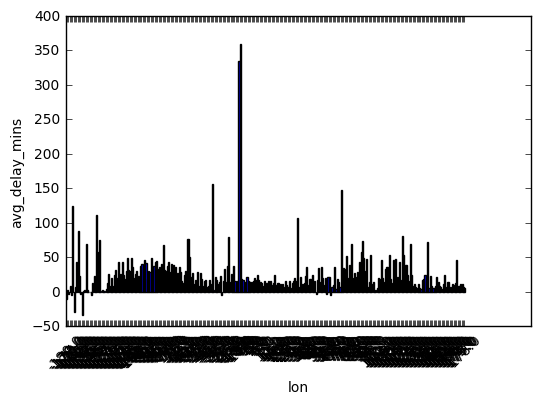

In [27]:
result.bar()

In [28]:
result = %sql select round(a.altitude, -2) alt, avg(f.delay_mins) avg_delay_mins from flight f right join airport a on a.code = f.departure_airport group by round(a.altitude, -2) having avg_delay_mins;

88 rows affected.


<Container object of 88 artists>

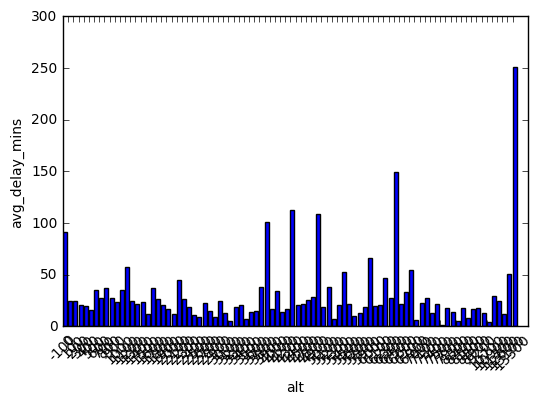

In [29]:
result.bar()

In [30]:
result = %sql select dayofweek(scheduled_departure) dow, count(*) cnt, avg(delay_mins) from flight group by dayofweek(scheduled_departure);

7 rows affected.


<Container object of 7 artists>

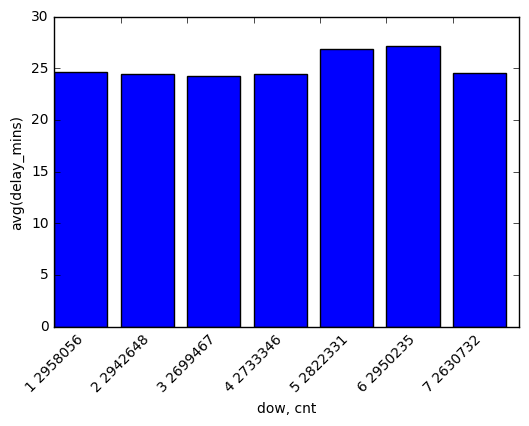

In [32]:
result.bar()

In [36]:
result = %sql select a.tz_offset, avg(f.delay_mins) avg_delay_mins from flight f right join airport a on a.code = f.departure_airport group by a.tz_offset having avg_delay_mins;

25 rows affected.


<Container object of 25 artists>

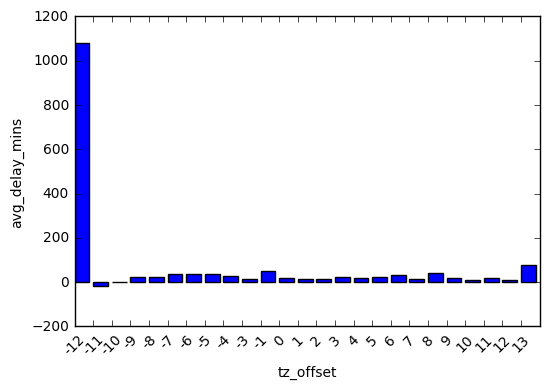

In [37]:
result.bar()